[Pandas User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html#user-guide) 

## 1. Merging Dataframes

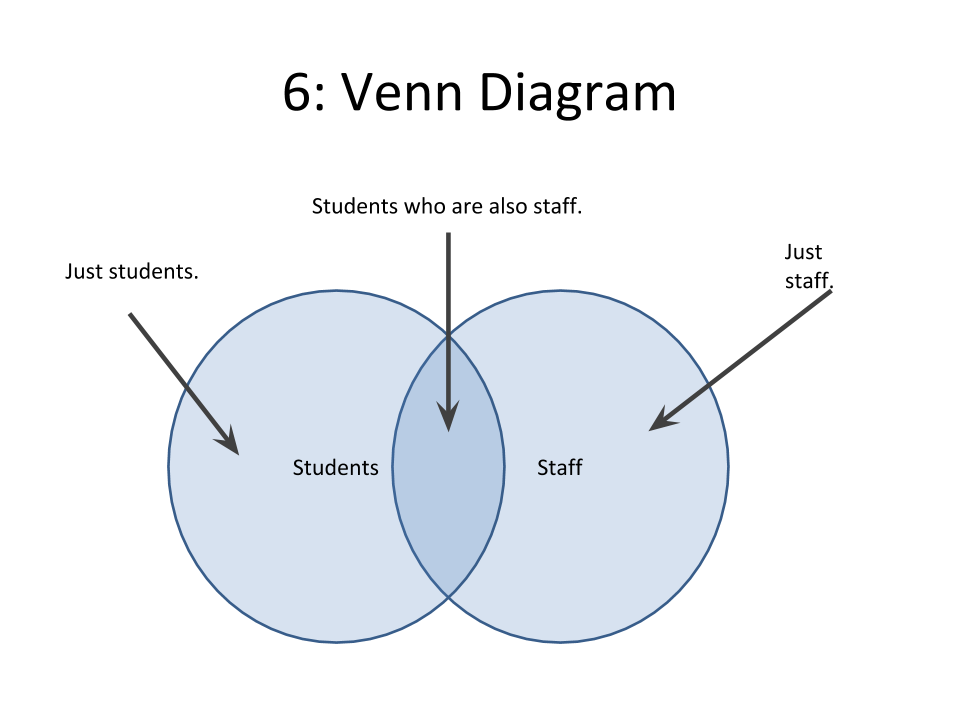

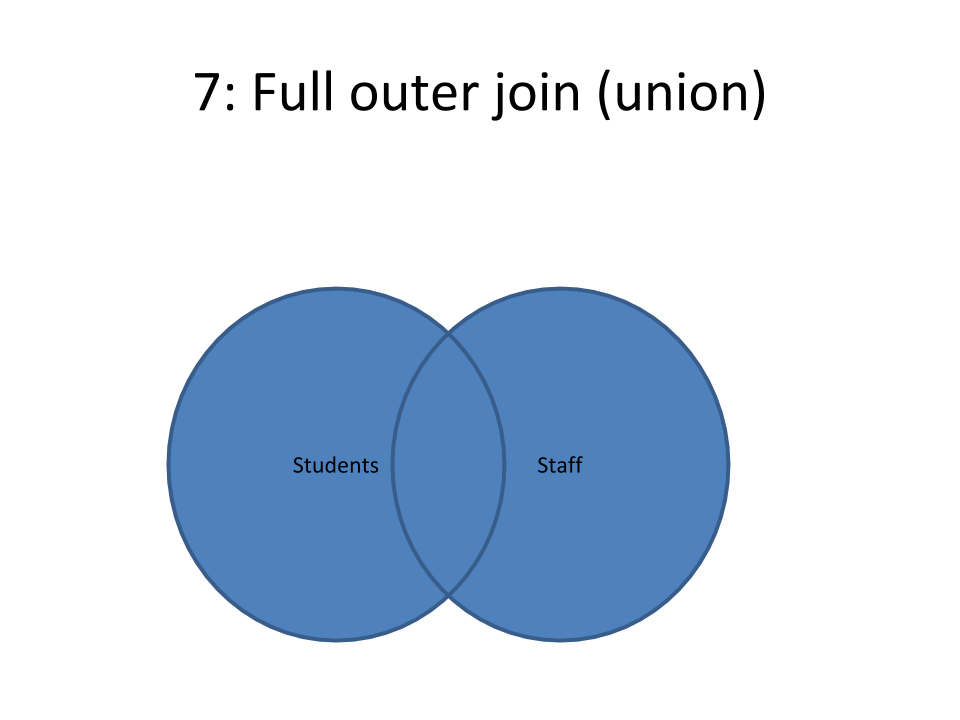
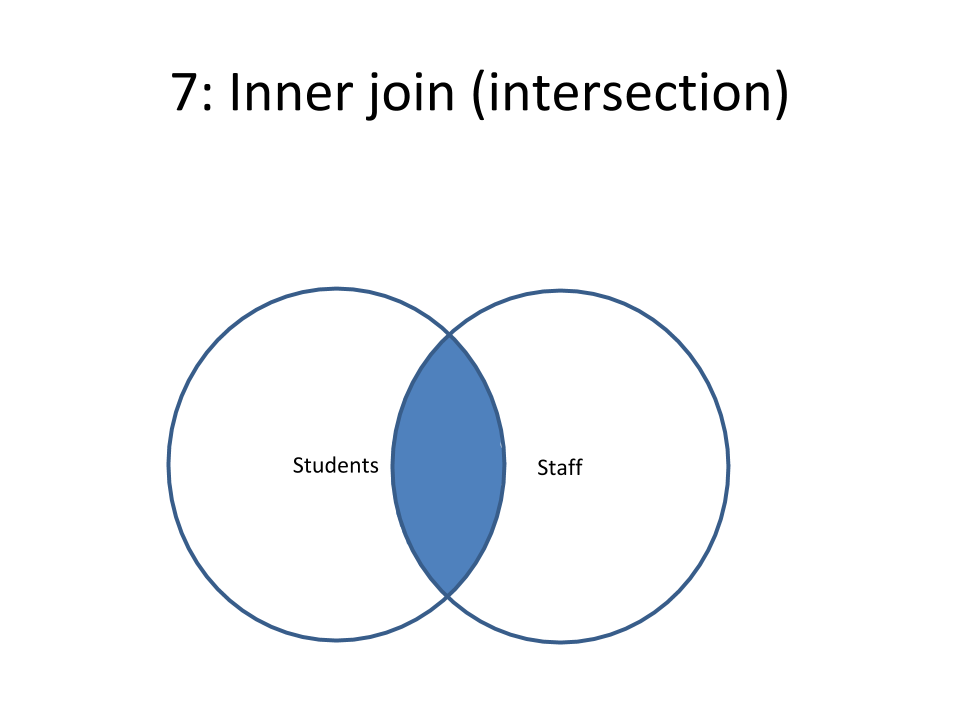

In [ ]:
import pandas as pd

In [ ]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')


print(staff_df.head())
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader
            School
Name              
James     Business
Mike           Law
Sally  Engineering


* merge()

In [ ]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [ ]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [ ]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [ ]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


* We can also do it another way. The merge method has a couple of other interesting parameters. 
* First, you don't need to use indices to join on, you can use columns as well. 
* Here we have a parameter called "on", and we can assign a column that both dataframe has as the joining column.


In [ ]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

# Now lets merge using the on parameter
pd.merge(staff_df, student_df, how='right', on='Name')

,Name,Role,School
0,James,Grader,Business
1,Mike,NaN,Law
2,Sally,Course liasion,Engineering


In [ ]:
# In the staff DataFrame, Location is where they work. For the student DataFrame, it is actually their home address.
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 
                          'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 
                          'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 
                          'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 
                            'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 
                            'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 
                            'Location': '512 Wilson Crescent'}])

* The merge function preserves this information, but appends an _x or _y to help differentiate between which index went with which column of data. 

* The _x is always the left DataFrame information, and the _y is always the right DataFrame information.

In [ ]:
pd.merge(staff_df, student_df, how='left', on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


* multi-indexing and multiple columns
* We use a list of the multiple columns that should be used to join keys from both dataframes on the on parameter.

In [ ]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 
                          'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 
                          'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 
                          'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 
                            'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 
                            'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 
                            'School': 'Engineering'}])


In [ ]:
pd.merge(staff_df, student_df, how='inner', on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


* If we think of merging as joining "horizontally", meaning we join on similar values in a column found in two
 dataframes then concatenating is joining "vertically", meaning we put dataframes on top or at the bottom of
each other.

In [ ]:
#to supress some of the jupyter warning messages and just tell read_csv to ignore bad lines
#so I'm going to start the cell with a cell magic called %%capture

%%capture
df_2011 = pd.read_csv("datasets/college_scorecard/MERGED2011_12_PP.csv", error_bad_lines=False)
df_2012 = pd.read_csv("datasets/college_scorecard/MERGED2012_13_PP.csv", error_bad_lines=False)
df_2013 = pd.read_csv("datasets/college_scorecard/MERGED2013_14_PP.csv", error_bad_lines=False)

In [ ]:
frames = [df_2011, df_2012, df_2013]
pd.concat(frames)

In [ ]:
pd.concat(frames, keys=['2011','2012','2013'])

## 2. Pandas Idioms
* A sort of sub-language within Python, Pandas has its own set of idioms. 


In [ ]:
import pandas as pd
import numpy as np

import timeit

df = pd.read_csv('/content/drive/MyDrive/etc/census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,INTERNATIONALMIG2010,...,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,GQESTIMATES2015,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,4801108,4816089,4830533,4846411,4858979,5034,15947,14981,14444,15878,12568,14226,59689,59062,57938,58334,58305,11089,48811,48357,50843,50228,50330,3137,10878,10705,7095,8106,7975,1357,...,677,-573,1135,116185,116212,115560,115666,116963,119088,119599,12.453020,12.282581,12.012080,12.056286,12.014973,10.183524,10.056360,10.541099,10.380963,10.371556,2.269496,2.226220,1.470981,1.675322,1.643417,1.027720,1.019840,1.002216,1.142716,1.179963,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,55253,55175,55038,55290,55347,89,593,-78,-137,252,57,151,636,615,574,623,600,152,507,558,583,504,467,-1,129,57,-9,119,133,33,...,22,-10,45,455,455,455,455,455,455,455,11.572789,11.138479,10.416194,11.293597,10.846281,9.225478,10.106133,10.579514,9.136393,8.442022,2.347311,1.032347,-0.163320,2.157204,2.404259,0.363924,0.289782,0.290347,0.326300,0.343466,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,186659,190396,195126,199713,203709,928,3466,3737,4730,4587,3996,517,2187,2092,2160,2186,2240,532,1825,1879,1902,2044,1992,-15,362,213,258,142,248,69,...,91,434,58,2307,2307,2307,2249,2304,2308,2309,11.826352,11.096524,11.205586,11.072868,11.104997,9.868812,9.966716,9.867141,10.353587,9.875515,1.957540,1.129809,1.338445,0.719281,1.229482,1.011215,0.912334,0.881921,1.073855,1.095627,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,27226,27159,26973,26815,26489,-116,-115,-67,-186,-158,-326,70,335,300,283,260,269,128,319,291,294,310,309,-58,16,9,-11,-50,-40,2,...,19,-1,-5,3193,3193,3382,3388,3389,3353,3352,12.278483,11.032454,10.455923,9.667584,10.093051,11.692048,10.701480,10.862337,11.526735,11.593877,0.586435,0.330974,-0.406414,-1.859151,-1.500825,-0.146609,-0.257424,-0.110840,-0.074366,0.000000,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,22733,22642,22512,22549,22583,-58,-128,-91,-130,37,34,44,266,245,259,247,253,34,278,237,281,211,223,10,-12,8,-22,36,30,2,...,14,-16,-21,2224,2224,2224,2224,2224,2233,2236,11.668202,10.798898,11.471852,10.962917,11.211557,12.194587,10.446281,12.446295,9.365083,9.882124,-0.526385,0.352617,-0.974443,1.597834,1.329434,0.438654,0.705234,0.797272,0.932070,0.930604,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


**1.  method chaining** : every method on an object returns a reference to that object. The beauty of this is that you can condense many different operations on a DataFrame, for instance, into one line or at least one statement of code.


In [ ]:
# 1. multiple index (state and city names)
# 2. data which has a summary level of 50
# 3. rename a column

(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  ...  RNETMIG2014  RNETMIG2015
STNAME  CTYNAME                            ...                          
Alabama Autauga County       50.0     3.0  ...     2.592270    -2.187333
        Baldwin County       50.0     3.0  ...    20.317142    18.293499
        Barbour County       50.0     3.0  ...    -3.978583   -10.543299
        Bibb County          50.0     3.0  ...     0.754533     1.107861
        Blount County        50.0     3.0  ...    -1.577232    -0.884411
...                           ...     ...  ...          ...          ...
Wyoming Sweetwater County    50.0     4.0  ...   -14.075283   -14.070195
        Teton County         50.0     4.0  ...    16.308671     1.520747
        Uinta County         50.0     4.0  ...   -14.740608   -12.606351
        Washakie County      50.0     4.0  ...   -18.020168     1.441961
        Weston County        50.0     4.0  ...     1.533635     6.935294

[3142 rows x 98 columns]

In [ ]:
# Now, the key with any good idiom is to understand when it isn't helping you. In this case, you can actually
# time both methods and see which one runs faster

# We can put the approach into a function and pass the function into the timeit function to count the time the
# parameter number allows us to choose how many times we want to run the function. Here we will just set it to
# 10

# Lets write a wrapper for our first function
def first_approach():
    global df
    # And we'll just paste our code right here
    return (df.where(df['SUMLEV']==50)
             .dropna()
             .set_index(['STNAME','CTYNAME'])
             .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

# Read in our dataset anew
df = pd.read_csv('/content/drive/MyDrive/etc/census.csv')

# And now lets run it
timeit.timeit(first_approach, number=10)

0.22865237899986823

In [ ]:
def second_approach():
    global df
    new_df = df[df['SUMLEV']==50]
    new_df.set_index(['STNAME','CTYNAME'], inplace=True)
    return new_df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

# Read in our dataset anew
df = pd.read_csv('/content/drive/MyDrive/etc/census.csv')

# And now lets run it
timeit.timeit(second_approach, number=10)

0.0646557230002145

* It is more readable but  might have performance issue.

2. **map()**

In [ ]:
# Let's take a look at our census DataFrame. In this DataFrame, we have five columns for population estimates,
# with each column corresponding with one year of estimates. It's quite reasonable to want to create some new
# columns for minimum or maximum values, and the apply function is an easy way to do this.

# First, we need to write a function which takes in a particular row of data, finds a minimum and maximum
# values, and returns a new row of data nd returns a new row of data.  We'll call this function min_max, this
# is pretty straight forward. We can create some small slice of a row by projecting the population columns.
# Then use the NumPy min and max functions, and create a new series with a label values represent the new
# values we want to apply.

def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [ ]:
# Then we just need to call apply on the DataFrame.

# Apply takes the function and the axis on which to operate as parameters. Now, we have to be a bit careful,
# we've talked about axis zero being the rows of the DataFrame in the past. But this parameter is really the
# parameter of the index to use. So, to apply across all rows, which is applying on all columns, you pass axis
# equal to 'columns'.
df.apply(min_max, axis='columns').head()

,min,max
0,4785161,4858979
1,54660,55347
2,183193,203709
3,26489,27341
4,22512,22861


In [ ]:
# Here's an example where we have a revised version of the function min_max Instead of returning a separate
# series to display the min and max we add two new columns in the original dataframe to store min and max

def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    # Create a new entry for max
    row['max'] = np.max(data)
    # Create a new entry for min
    row['min'] = np.min(data)
    return row
# Now just apply the function across the dataframe
df.apply(min_max, axis='columns')

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,INTERNATIONALMIG2010,...,RESIDUAL2015,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,GQESTIMATES2015,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,max,min
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,4801108,4816089,4830533,4846411,4858979,5034,15947,14981,14444,15878,12568,14226,59689,59062,57938,58334,58305,11089,48811,48357,50843,50228,50330,3137,10878,10705,7095,8106,7975,1357,...,1135,116185,116212,115560,115666,116963,119088,119599,12.453020,12.282581,12.012080,12.056286,12.014973,10.183524,10.056360,10.541099,10.380963,10.371556,2.269496,2.226220,1.470981,1.675322,1.643417,1.027720,1.019840,1.002216,1.142716,1.179963,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4858979,4785161
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,55253,55175,55038,55290,55347,89,593,-78,-137,252,57,151,636,615,574,623,600,152,507,558,583,504,467,-1,129,57,-9,119,133,33,...,45,455,455,455,455,455,455,455,11.572789,11.138479,10.416194,11.293597,10.846281,9.225478,10.106133,10.579514,9.136393,8.442022,2.347311,1.032347,-0.163320,2.157204,2.404259,0.363924,0.289782,0.290347,0.326300,0.343466,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347,54660
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,186659,190396,195126,199713,203709,928,3466,3737,4730,4587,3996,517,2187,2092,2160,2186,2240,532,1825,1879,1902,2044,1992,-15,362,213,258,142,248,69,...,58,2307,2307,2307,2249,2304,2308,2309,11.826352,11.096524,11.205586,11.072868,11.104997,9.868812,9.966716,9.867141,10.353587,9.875515,1.957540,1.129809,1.338445,0.719281,1.229482,1.011215,0.912334,0.881921,1.073855,1.095627,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709,183193
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,27226,27159,26973,26815,26489,-116,-115,-67,-186,-158,-326,70,335,300,283,260,269,128,319,291,294,310,309,-58,16,9,-11,-50,-40,2,...,-5,3193,3193,3382,3388,3389,3353,3352,12.278483,11.032454,10.455923,9.667584,10.093051,11.692048,10.701480,10.862337,11.526735,11.593877,0.586435,0.330974,-0.406414,-1.859151,-1.500825,-0.146609,-0.257424,-0.110840,-0.074366,0.000000,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341,26489
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,22733,22642,22512,22549,22583,-58,-128,-91,-130,37,34,44,266,245,259,247,253,34,278,237,281,211,223,10,-12,8,-22,36,30,2,...,-21,2224,2224,2224,2224,2224,2233,2236,11.668202,10.798898,11.471852,10.962917,11.211557,12.194587,10.446281,12.446295,9.365083,9.882124,-0.526385,0.352617,-0.974443,1.597834,1.329434,0.438654,0.705234,0.797272,0.932070,0.930604,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861,22512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
# Apply is an extremely important tool in your toolkit. The reason I introduced apply here is because you
# rarely see it used with large function definitions, like we did. Instead, you typically see it used with
# lambdas. To get the most of the discussions you'll see online, you're going to need to know how to at least
# read lambdas.

# Here's You can imagine how you might chain several apply calls with lambdas together to create a readable
# yet succinct data manipulation script. One line example of how you might calculate the max of the columns
# using the apply function.
rows = ['POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013','POPESTIMATE2014', 
        'POPESTIMATE2015']
# Now we'll just apply this across the dataframe with a lambda
df.apply(lambda x: np.max(x[rows]), axis=1).head()

0    4858979
1      55347
2     203709
3      27341
4      22861
dtype: int64

In [ ]:
# The beauty of the apply function is that it allows flexibility in doing whatever manipulation that you
# desire, as the function you pass into apply can be any customized however you want. Let's say we want to
# divide the states into four categories: Northeast, Midwest, South, and West We can write a customized
# function that returns the region based on the state the state regions information is obtained from Wikipedia

def get_state_region(x):
    northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 
                 'Rhode Island','Vermont','New York','New Jersey','Pennsylvania']
    midwest = ['Illinois','Indiana','Michigan','Ohio','Wisconsin','Iowa',
               'Kansas','Minnesota','Missouri','Nebraska','North Dakota',
               'South Dakota']
    south = ['Delaware','Florida','Georgia','Maryland','North Carolina',
             'South Carolina','Virginia','District of Columbia','West Virginia',
             'Alabama','Kentucky','Mississippi','Tennessee','Arkansas',
             'Louisiana','Oklahoma','Texas']
    west = ['Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Utah',
            'Wyoming','Alaska','California','Hawaii','Oregon','Washington']
    
    if x in northeast:
        return "Northeast"
    elif x in midwest:
        return "Midwest"
    elif x in south:
        return "South"
    else:
        return "West"

In [ ]:
# Now we have the customized function, let's say we want to create a new column called Region, which shows the
# state's region, we can use the customized function and the apply function to do so. The customized function
# is supposed to work on the state name column STNAME. So we will set the apply function on the state name
# column and pass the customized function into the apply function
df['state_region'] = df['STNAME'].apply(lambda x: get_state_region(x))

In [ ]:
# Now let's see the results
df[['STNAME','state_region']].head()

,STNAME,state_region
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South


## 3. Group by
* Sometimes we want to select data based on groups and understand aggregated data on a group level.
*  Pandas has a groupby() function to speed up such task. The idea behind the groupby() function is that it takes some dataframe, splits it into chunks based on some key values, applies computation on those chunks, then combines the results back together into another dataframe. In pandas this is refered to as the split-apply-combine pattern.

### splitting

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/etc/census.csv')
# And exclude state level summarizations, which have sum level value of 40
df = df[df['SUMLEV']==50]
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,INTERNATIONALMIG2010,...,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,GQESTIMATES2015,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,55253,55175,55038,55290,55347,89,593,-78,-137,252,57,151,636,615,574,623,600,152,507,558,583,504,467,-1,129,57,-9,119,133,33,...,22,-10,45,455,455,455,455,455,455,455,11.572789,11.138479,10.416194,11.293597,10.846281,9.225478,10.106133,10.579514,9.136393,8.442022,2.347311,1.032347,-0.163320,2.157204,2.404259,0.363924,0.289782,0.290347,0.326300,0.343466,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,186659,190396,195126,199713,203709,928,3466,3737,4730,4587,3996,517,2187,2092,2160,2186,2240,532,1825,1879,1902,2044,1992,-15,362,213,258,142,248,69,...,91,434,58,2307,2307,2307,2249,2304,2308,2309,11.826352,11.096524,11.205586,11.072868,11.104997,9.868812,9.966716,9.867141,10.353587,9.875515,1.957540,1.129809,1.338445,0.719281,1.229482,1.011215,0.912334,0.881921,1.073855,1.095627,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,27226,27159,26973,26815,26489,-116,-115,-67,-186,-158,-326,70,335,300,283,260,269,128,319,291,294,310,309,-58,16,9,-11,-50,-40,2,...,19,-1,-5,3193,3193,3382,3388,3389,3353,3352,12.278483,11.032454,10.455923,9.667584,10.093051,11.692048,10.701480,10.862337,11.526735,11.593877,0.586435,0.330974,-0.406414,-1.859151,-1.500825,-0.146609,-0.257424,-0.110840,-0.074366,0.000000,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,22733,22642,22512,22549,22583,-58,-128,-91,-130,37,34,44,266,245,259,247,253,34,278,237,281,211,223,10,-12,8,-22,36,30,2,...,14,-16,-21,2224,2224,2224,2224,2224,2233,2236,11.668202,10.798898,11.471852,10.962917,11.211557,12.194587,10.446281,12.446295,9.365083,9.882124,-0.526385,0.352617,-0.974443,1.597834,1.329434,0.438654,0.705234,0.797272,0.932070,0.930604,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,57711,57776,57734,57658,57673,51,338,65,-42,-76,15,183,744,710,646,618,603,133,570,592,585,589,590,50,174,118,61,29,13,5,...,-22,-14,53,489,489,489,489,489,489,489,12.929686,12.295756,11.185179,10.711314,10.456859,9.905808,10.252236,10.128993,10.208680,10.231421,3.023878,2.043520,1.056186,0.502634,0.225438,0.052136,0.329041,0.346290,0.485302,0.485559,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [ ]:
# In the first example for groupby() I want to use the census date. Let's get a list of the unique states,
# then we can iterate over all the states and for each state we reduce the data frame and calculate the
# average.

# Let's run such task for 3 times and time it. For this we'll use the cell magic function %%timeit

%%timeit -n 3

for state in df['STNAME'].unique():
    # We'll just calculate the average using numpy for this particular state
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    # And we'll print it to the screen
    print('Counties in state ' + state + 
          ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

* If you scroll down to the bottom of that output you can see it takes a fair bit of time to finish.
* Now let's try another approach using groupby().

In [ ]:
%%timeit -n 3
# For this method, we start by telling pandas we're interested in grouping by state name, this is the "split"
for group, frame in df.groupby('STNAME'):
    # You'll notice there are two values we set here. groupby() returns a tuple, where the first value is the
    # value of the key we were trying to group by, in this case a specific state name, and the second one is
    # projected dataframe that was found for that group
    
    # Now we include our logic in the "apply" step, which is to calculate an average of the census2010pop
    avg = np.average(frame['CENSUS2010POP'])
    # And print the results
    print('Counties in state ' + group + 
          ' have an average population of ' + str(avg))
# And we don't have to worry about the combine step in this case, because all of our data transformation is
# actually printing out results.

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

* There is a huge difference in speed!
---
* Now, 99% of the time, you'll use group by on one or more columns. But you can also provide a function to group by and use that to segment your data.

* This is a bit of a fabricated example but lets say that you have a big batch job with lots of processing and you want to work on only a third or so of the states at a given time. We could create some function which returns a number between zero and two based on the first character of the state name. 

* Then we can tell group by to use this function to split up our data frame. It's important to note that in order to do this you need to set the index of the data frame to be the column that you want to group by first.

In [ ]:
# We'll create some new function called set_batch_number and if the first letter of the parameter is a capital
# M we'll return a 0. 
# If it's a capital Q we'll return a 1 and otherwise we'll return a 2. 
# Then we'll pass this function to the data frame

df = df.set_index('STNAME')

def set_batch_number(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

# The dataframe is supposed to be grouped by according to the batch number And we will loop through each batch
# group
for group, frame in df.groupby(set_batch_number):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


* if no column identifier is passed groupby() will automatically use the index.

---
* Let's take one more look at an example of how we might group data. 
* In this example, I want to use a dataset of housing from airbnb. In this dataset there are two columns of interest, one is the cancellation_policy and the other is the review_scores_value.

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/etc/listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1

In [ ]:
#Let's set multiindex.
df = df.set_index(["cancellation_policy","review_scores_value"])

# When we have a multiindex we need to pass in the levels we are interested in grouping by
for group, frame in df.groupby(level=(0,1)):
    print(group)

('flexible', 2.0)
('flexible', 4.0)
('flexible', 5.0)
('flexible', 6.0)
('flexible', 7.0)
('flexible', 8.0)
('flexible', 9.0)
('flexible', 10.0)
('moderate', 2.0)
('moderate', 4.0)
('moderate', 6.0)
('moderate', 7.0)
('moderate', 8.0)
('moderate', 9.0)
('moderate', 10.0)
('strict', 2.0)
('strict', 3.0)
('strict', 4.0)
('strict', 5.0)
('strict', 6.0)
('strict', 7.0)
('strict', 8.0)
('strict', 9.0)
('strict', 10.0)
('super_strict_30', 6.0)
('super_strict_30', 7.0)
('super_strict_30', 8.0)
('super_strict_30', 9.0)
('super_strict_30', 10.0)


In [ ]:
#What if we want to separate out all the 10's from those under ten?

def grouping_fun(item):
    if item[1] == 10.0:
        return (item[0],"10.0")
    else:
        return (item[0],"not 10.0")

for group, frame in df.groupby(by=grouping_fun):
    print(group)

('flexible', '10.0')
('flexible', 'not 10.0')
('moderate', '10.0')
('moderate', 'not 10.0')
('strict', '10.0')
('strict', 'not 10.0')
('super_strict_30', '10.0')
('super_strict_30', 'not 10.0')


In [ ]:
df.head()

id  ... reviews_per_month
cancellation_policy review_scores_value            ...                  
moderate            NaN                  12147973  ...               NaN
                    9.0                   3075044  ...              1.30
                    10.0                     6976  ...              0.47
                    10.0                  1436513  ...              1.00
flexible            10.0                  7651065  ...              2.25

[5 rows x 93 columns]

### Applying

* Three broad categories of data processing during the apply step,
1. Aggregation
2. Transformation
3. Filtration

of group data

#### (1) Aggregation

In [ ]:
df=df.reset_index()

# Now lets group by the cancellation policy and find the average review_scores_value by group
df.groupby("cancellation_policy").agg({"review_scores_value":np.average})

,review_scores_value
cancellation_policy,
flexible,NaN
moderate,NaN
strict,NaN
super_strict_30,NaN


* np.average does not ignore nans!

In [ ]:
df.groupby("cancellation_policy").agg({"review_scores_value":np.nanmean})

,review_scores_value
cancellation_policy,
flexible,9.237421
moderate,9.307398
strict,9.081441
super_strict_30,8.537313


* We can just extend this dictionary to aggregate by multiple functions or multiple columns.

In [ ]:
df.groupby("cancellation_policy").agg({"review_scores_value":(np.nanmean,np.nanstd),
                                      "reviews_per_month":np.nanmean})

review_scores_value           reviews_per_month
                                nanmean    nanstd           nanmean
cancellation_policy                                                
flexible                       9.237421  1.096271          1.829210
moderate                       9.307398  0.859859          2.391922
strict                         9.081441  1.040531          1.873467
super_strict_30                8.537313  0.840785          0.340143

1. First, we do a group by on the dataframe object by the column "cancellation_policy". : Creating a new GroupBy object.
2. Second, we invoke the agg() on the object. : The agg function is going to apply one or more functions we specify to the group dataframes and return a single row per dataframe/group. 
3. Third, we call this function and send it two dictionary entries, each with the key indicating which column we wanted
functions applied to. 

### (2) Transformation
* When agg() returns a single value per column, so one row per group, transform() returns an object that is the same size as the group.

* For instance, suppose we want to include the average rating values in a given group by cancellation policy, but preserve the dataframe shape so that we could generate a difference between an individual observation and the sum.

In [ ]:
# 1. Define some subset of columns we are interested in.
cols=['cancellation_policy','review_scores_value']

# 2. lets transform it and store this in its own dataframe.
transform_df = df[cols].groupby('cancellation_policy').transform(np.nanmean)
transform_df.head()

,review_scores_value
0,9.307398
1,9.307398
2,9.307398
3,9.307398
4,9.237421


* The index here is the same as the original dataframe.

In [ ]:
transform_df.rename({'review_scores_value':'mean_review_scores'}, axis = 'columns', inplace=True)
df = df.merge(transform_df, left_index=True, right_index=True)
df.head()

,cancellation_policy,review_scores_value,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,...,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores
0,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",...,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,f,1,NaN,9.307398
1,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",...,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,f,NaN,NaN,t,f,f,1,1.30,9.307398
2,moderate,10.0,6976

In [ ]:
df['mean_diff']=np.absolute(df['review_scores_value']-df['mean_review_scores'])
df['mean_diff'].head()

0         NaN
1    0.307398
2    0.692602
3    0.692602
4    0.762579
Name: mean_diff, dtype: float64

### (3) Filtering

* The GroupBy object has build in support for filtering groups as well. 
* It's often that you'll want to group by some feature, then make some transformation to the groups, then drop certain groups as part of your cleaning routines. 
* The filter() function takes in a function which it applies to each group dataframe and returns either a True or a False, depending upon whether that group should be included in the results.

In [ ]:
# For instance, if we only want those groups which have a mean rating above 9 included in our results
df.groupby('cancellation_policy').filter(lambda x: np.nanmean(x['review_scores_value'])>9.2)

,cancellation_policy,review_scores_value,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores,mean_diff
0,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",...,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,f,1,NaN,9.307398,NaN
1,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,f,NaN,NaN,t,f,f,1,1.30,9.307398,0.307398
2,moderate,10.0

---


In [ ]:
# Lets look at an example using our airbnb data, I'm going to get a clean copy of the dataframe
df=pd.read_csv("/content/drive/MyDrive/etc/listings.csv")
# And lets just include some of the columns we were interested in previously
df=df[['cancellation_policy','review_scores_value']]
df.head()

,cancellation_policy,review_scores_value
0,moderate,NaN
1,moderate,9.0
2,moderate,10.0
3,moderate,10.0
4,flexible,10.0


In [ ]:
#With apply() we could wrap this logic in one place.
def calc_mean_review_scores(group):
    # group is a dataframe just of whatever we have grouped by, e.g. cancellation policy, so we can treat
    # this as the complete dataframe
    avg=np.nanmean(group["review_scores_value"])
    # now broadcast our formula and create a new column
    group["review_scores_mean"]=np.abs(avg-group["review_scores_value"])
    return group

# Now just apply this to the groups
df.groupby('cancellation_policy').apply(calc_mean_review_scores).head()

,cancellation_policy,review_scores_value,review_scores_mean
0,moderate,NaN,NaN
1,moderate,9.0,0.307398
2,moderate,10.0,0.692602
3,moderate,10.0,0.692602
4,flexible,10.0,0.762579


## 4. Scale

* There are 4 different kinds of scale.

1. Ration scale
> * units are equally spaced
> * mathematical operations of +-/* are all valid.
> * E.g. height, weight

2. Interval scale
> * units are equally spaced, but there is no true zero.

3. Ordinal scale
> * the order of the units is important but not evely spaced.
> * Letter grades such as A+, A are a good example.
> * It's common in machine learning.

4. Nominal scle
> * categories of data, but the categories have no order with respect of one another.
> * Teams of sports.

In [ ]:
import pandas as pd


df=pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 
                       'ok', 'ok', 'ok', 'poor', 'poor'],
               columns=["Grades"])
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [ ]:
df.dtypes

Grades    object
dtype: object

In [ ]:
df["Grades"].astype("category").head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): ['A', 'A+', 'A-', 'B', ..., 'C+', 'C-', 'D', 'D+']

* We can tell pandas that the data is ordered by first creating a new categorical data type with the list of the categories (in order) and the ordered=True flag.

In [ ]:
my_categories=pd.CategoricalDtype(categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'], 
                           ordered=True)
# then we can just pass this to the astype() function
grades=df["Grades"].astype(my_categories)
grades.head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): ['D' < 'D+' < 'C-' < 'C' ... 'B+' < 'A-' < 'A' < 'A+']

In [ ]:
df[df["Grades"]>"C"]

,Grades
ok,C+
ok,C-
poor,D+
poor,D


In [ ]:
grades[grades>"C"]

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
Name: Grades, dtype: category
Categories (11, object): ['D' < 'D+' < 'C-' < 'C' ... 'B+' < 'A-' < 'A' < 'A+']

* Sometimes it is useful to represent categorical values as each being a column with a true or a false as to whether the category applies. This is especially common in feature extraction, which is a topic in the data mining course. 
* Variables with a boolean value are typically called dummy variables, and pandas has a built in function called get_dummies which will convert the values of a single column into multiple columns of zeros and ones indicating the presence of the dummy variable.

In [ ]:
# Lets go back to our census data for an example. We saw that we could group by state, then aggregate to get a
# list of the average county size by state. If we further apply cut to this with, say, ten bins, we can see
# the states listed as categoricals using the average county size.

# let's bring in numpy
import numpy as np

# Now we read in our dataset
df=pd.read_csv("/content/drive/MyDrive/etc/census.csv")

# And we reduce this to country data
df=df[df['SUMLEV']==50]

# And for a few groups
df=df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg(np.average)

df.head()

STNAME
Alabama        71339.343284
Alaska         24490.724138
Arizona       426134.466667
Arkansas       38878.906667
California    642309.586207
Name: CENSUS2010POP, dtype: float64

In [ ]:
# Now if we just want to make "bins" of each of these, we can use cut()
pd.cut(df,10)

STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

* 컬럼 데이터를 bin 개수만큼 구간을 나누고 각 row가 어떤 구간에 포함되는지 표시.
* Here we see that states like alabama and alaska fall into the same category, while california and the disctrict of columbia fall in a very different category.

* Now, cutting is just one way to build categories from your data, and there are many other methods. 
* For instance, cut gives you interval data, where the spacing between each category is equal sized. But sometimes
 you want to form categories based on frequency – you want the number of items in each bin to the be the same, instead of the spacing between bins. It really depends on what the shape of your data is, and what you’re planning to do with it.

## 5. Pivot Table

A pivot table is a way of summarizing data in a DataFrame for a particular purpose. It makes heavy use of the aggregation function. A pivot table is itself a DataFrame, where the rows represent one variable that you're interested in, the columns another, and the cell's some aggregate value. A pivot table also tends to includes marginal values as well, which are the sums for each column and row. This allows you to be able to see the relationship between two variables at just a glance.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/etc/cwurData.csv')
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [ ]:
def rank_category(rank):
    if (rank >= 1) & (rank <= 100):
        return "First Tier Top University"
    elif (rank >= 101) & (rank <= 200):
        return "Second Tier Top University"
    elif (rank >= 201) & (rank <= 300):
        return "Third Tier Top University"
    return "Other Top University"

df['Rank_level'] = df['world_rank'].apply(lambda x: rank_category(x))
df.head()
    
    

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,Rank_level
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,First Tier Top University
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,First Tier Top University
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,First Tier Top University
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,First Tier Top University
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,First Tier Top University


In [ ]:
df.pivot_table(values = 'score', index = 'country', columns='Rank_level', aggfunc=[np.mean]).head()

mean  ...                          
Rank_level First Tier Top University  ... Third Tier Top University
country                               ...                          
Argentina                        NaN  ...                       NaN
Australia                    47.9425  ...                 47.285000
Austria                          NaN  ...                 47.066667
Belgium                      51.8750  ...                 46.746667
Brazil                           NaN  ...                       NaN

[5 rows x 4 columns]

In [ ]:
df.pivot_table(values = 'score', index = 'country', columns='Rank_level', aggfunc=[np.mean, np.max]).head()

mean  ...                      amax
Rank_level First Tier Top University  ... Third Tier Top University
country                               ...                          
Argentina                        NaN  ...                       NaN
Australia                    47.9425  ...                     47.47
Austria                          NaN  ...                     47.78
Belgium                      51.8750  ...                     47.14
Brazil                           NaN  ...                       NaN

[5 rows x 8 columns]

In [ ]:
# we can also summarize the values within a given top level column. 
df.pivot_table(values = 'score', index = 'country', columns='Rank_level', aggfunc=[np.mean, np.max],
               margins=True).head()

mean  ...   amax
Rank_level First Tier Top University  ...    All
country                               ...       
Argentina                        NaN  ...  45.66
Australia                    47.9425  ...  51.61
Austria                          NaN  ...  47.78
Belgium                      51.8750  ...  52.03
Brazil                           NaN  ...  49.82

[5 rows x 10 columns]

In [ ]:
# A pivot table is just a multi-level dataframe, and we can access series or cells in the dataframe in a similar way 
# as we do so for a regular dataframe. 

# Let's create a new dataframe from our previous example
new_df=df.pivot_table(values='score', index='country', columns='Rank_level', aggfunc=[np.mean, np.max], 
               margins=True)
# Now let's look at the index
print(new_df.index)
# And let's look at the columns
print(new_df.columns)

Index(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Puerto Rico', 'Romania', 'Russia', 'Saudi Arabia',
       'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'Turkey', 'USA', 'Uganda', 'United Arab Emirates', 'United Kingdom',
       'Uruguay', 'All'],
      dtype='object', name='country')
MultiIndex([('mean',  'First Tier Top University'),
            ('mean',       'Other Top University'),
            ('mean', 'Second Tier Top University'),
            ('mean',  'Thir

In [ ]:
new_df['mean']['First Tier Top University'].head()

country
Argentina        NaN
Australia    47.9425
Austria          NaN
Belgium      51.8750
Brazil           NaN
Name: First Tier Top University, dtype: float64

In [ ]:
type(new_df['mean']['First Tier Top University'])

pandas.core.series.Series

In [ ]:
# What if we want to find the country that has the maximum average score on First Tier Top University level?
# We can use the idxmax() function.
new_df['mean']['First Tier Top University'].idxmax()

'United Kingdom'

* Stacking is pivoting the lowermost column index to become the innermost row index. 
* Unstacking is the inverse of stacking, pivoting the innermost row index to become the lowermost column index. 

In [ ]:
# Let's look at our pivot table first to refresh what it looks like
new_df.head()

mean  ...   amax
Rank_level First Tier Top University  ...    All
country                               ...       
Argentina                        NaN  ...  45.66
Australia                    47.9425  ...  51.61
Austria                          NaN  ...  47.78
Belgium                      51.8750  ...  52.03
Brazil                           NaN  ...  49.82

[5 rows x 10 columns]

In [ ]:
# Now let's try stacking, this should move the lowermost column, so the tiers of the university rankings, to
# the inner most row
new_df=new_df.stack()
new_df.head()

mean   amax
country   Rank_level                                  
Argentina Other Top University        44.672857  45.66
          All                         44.672857  45.66
Australia First Tier Top University   47.942500  51.61
          Other Top University        44.645750  45.97
          Second Tier Top University  49.242500  50.40

In [ ]:
new_df.unstack().head()

mean  ...    amax
Rank_level First Tier Top University  ...     All
country                               ...        
All                        58.350675  ...  100.00
Argentina                        NaN  ...   45.66
Australia                  47.942500  ...   51.61
Austria                          NaN  ...   47.78
Belgium                    51.875000  ...   52.03

[5 rows x 10 columns]

In [ ]:
new_df.unstack().unstack().head()

      Rank_level                 country  
mean  First Tier Top University  All          58.350675
                                 Argentina          NaN
                                 Australia    47.942500
                                 Austria            NaN
                                 Belgium      51.875000
dtype: float64

## 6. Date/Time Functionality

In [ ]:
import pandas as pd
import numpy as np

### **Timestamp**

In [ ]:
pd.Timestamp('9/1/2019 10:05AM')

Timestamp('2019-09-01 10:05:00')

In [ ]:
# We can also create a timestamp by passing multiple parameters such as year, month, date, hour,
# minute, separately
pd.Timestamp(2019, 12, 20, 0, 0)

Timestamp('2019-12-20 00:00:00')

In [ ]:
# Timestamp also has some useful attributes, such as isoweekday(), which shows the weekday of the timestamp
# note that 1 represents Monday and 7 represents Sunday
pd.Timestamp(2019, 12, 20, 0, 0).isoweekday()

5

In [ ]:
# You can find extract the specific year, month, day, hour, minute, second from a timestamp
pd.Timestamp(2019, 12, 20, 5, 2, 23).second

23

### **Period**

In [ ]:
# Period represents a single time span, such as a specific day or month.
pd.Period('1/2016')

Period('2016-01', 'M')

In [ ]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

In [ ]:
pd.Period('1/2016') + 5

Period('2016-06', 'M')

In [ ]:
pd.Period('3/5/2016') - 2

Period('2016-03-03', 'D')

### **DatetimeIndex and PeriodIndex**

In [ ]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), 
                             pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [ ]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), 
                             pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [ ]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### **Converting to Datetime**

In [ ]:
# a bunch of different date formats
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']

# And just some random data
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, 
                   columns=list('ab'))
ts3

,a,b
2 June 2013,43,31
"Aug 29, 2014",17,99
2015-06-26,77,87
7/12/16,73,50


In [ ]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,43,31
2014-08-29,17,99
2015-06-26,77,87
2016-07-12,73,50


In [ ]:
# to_datetime also() has options to change the date parse order. For example, we 
# can pass in the argument dayfirst = True to parse the date in European date.

pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### **Timedelta**

* Timedeltas are differences in times.
* This is not the same as a a period, but conceptually similar.

In [ ]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [ ]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### **Offset**

* Offset is similar to timedelta, but it follows specific calendar duration rules. 
* Offset allows flexibility in terms of types of time intervals. Besides hour, day, week, month, etc it also has business day, end of month, semi month begin etc


In [ ]:
pd.Timestamp('9/4/2016').weekday()

6

In [ ]:
# Now we can now add the timestamp with a week ahead
pd.Timestamp('9/4/2016') + pd.offsets.Week()

Timestamp('2016-09-11 00:00:00')

In [ ]:
pd.Timestamp('9/4/2016') + pd.offsets.MonthEnd()

Timestamp('2016-09-30 00:00:00')

### **Working with Dates in a Dataframe**

In [ ]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [ ]:
#business day
pd.date_range('10-01-2016', periods=9, freq='B')

DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06',
               '2016-10-07', '2016-10-10', '2016-10-11', '2016-10-12',
               '2016-10-13'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
# Or you can do quarterly, with the quarter start in June
pd.date_range('04-01-2016', periods=12, freq='QS-JUN')

DatetimeIndex(['2016-06-01', '2016-09-01', '2016-12-01', '2017-03-01',
               '2017-06-01', '2017-09-01', '2017-12-01', '2018-03-01',
               '2018-06-01', '2018-09-01', '2018-12-01', '2019-03-01'],
              dtype='datetime64[ns]', freq='QS-JUN')

In [ ]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,101,129
2016-10-16,105,122
2016-10-30,112,123
2016-11-13,115,117
2016-11-27,118,115
2016-12-11,124,118
2016-12-25,133,122
2017-01-08,130,120
2017-01-22,125,118


In [ ]:
df.index.weekday_name

AttributeError: ignored

In [ ]:
# We can also use diff() to find the difference between each date's value.
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,4.0,-7.0
2016-10-30,7.0,1.0
2016-11-13,3.0,-6.0
2016-11-27,3.0,-2.0
2016-12-11,6.0,3.0
2016-12-25,9.0,4.0
2017-01-08,-3.0,-2.0
2017-01-22,-5.0,-2.0


In [ ]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,106.0,124.666667
2016-11-30,116.5,116.000000
2016-12-31,128.5,120.000000
2017-01-31,127.5,119.000000


In [ ]:
# we can use partial string indexing to find values from a particular year,
df['2017']

,Count 1,Count 2
2017-01-08,130,120
2017-01-22,125,118


In [ ]:
df['2016-12']